In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder

In [2]:
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)

numpy version: 1.24.1
pandas version: 1.5.2
seaborn version: 0.12.2


In [3]:
dataset = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
dataset.duplicated().sum()

0

In [5]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
print(dataset['SeniorCitizen'].unique(), dataset['SeniorCitizen'].nunique())

[0 1] 2


In [7]:
dataset.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [8]:
dataset[(dataset==' ').any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
(dataset==' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
dataset[(dataset['TotalCharges']!=" ") & (dataset['tenure']==0)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


since there's only a few data that doesn't have a TotalCharges value and all of them also have tenure value of zeros, it would be safe to remove all 11 data.

In [9]:
dataset = dataset[~(dataset['TotalCharges']==" ")]
(dataset['TotalCharges']==" ").sum()

0

In [10]:
dataset.reset_index(drop=True, inplace=True)

### Fixing Data Types

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [11]:
dataset['TotalCharges'] = dataset['TotalCharges'].astype('float64')
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].astype('object')

In [8]:
dataset.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [17]:
dataset.describe(include=['O'])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


#### Finding Outliers Using IQR

In [12]:
def iqr_outliers(data, columns):
    outlier_idxs = []
    for col in columns:
        Q1 = np.quantile(data[col], 0.25)
        Q3 = np.quantile(data[col], 0.75)
        IQR = Q3 - Q1

        outliers = data[(data[col] < (Q1-1.5*IQR)) | (data[col] > (Q3+1.5*IQR))]

        outlier_idxs.extend(outliers.index)
        
    final_idxs = list(set(outlier_idxs))
    return final_idxs

In [13]:
num_cols = (dataset.loc[:, (dataset.dtypes==float) | (dataset.dtypes==int)]).columns

In [14]:
outlier_idx = iqr_outliers(dataset, num_cols)
print(outlier_idx)
dataset.iloc[outlier_idx]

[]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


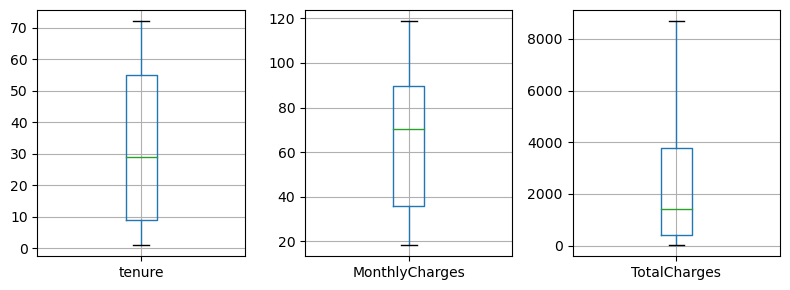

In [21]:
plt.figure(figsize=(8,3))
plt.subplot(131)
dataset.boxplot('tenure')
plt.subplot(132)
dataset.boxplot('MonthlyCharges')
plt.subplot(133)
dataset.boxplot('TotalCharges')
plt.tight_layout()
plt.show()

No outliers found using the interquartile range method, and the boxplot confirms it. No values are beyond the whiskers.

### EDA

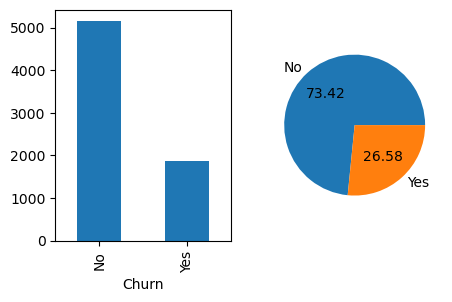

In [22]:
plt.figure(figsize=(5,3))
plt.subplot(121)
dataset.value_counts('Churn').plot.bar()
plt.subplot(122)
dataset.value_counts('Churn').plot.pie(autopct='%.2f')
plt.axis('off')
plt.show()

A few important takeaways:
* Around 26% customers leave the platform within the last month
* There's obviously an imbalace dataset situation going on. Checking on how the model will perform using precision, recall and specificity would be important later on.

#### Churn Proportion in Different Attributes

In [15]:
obj_cols = list(dataset.select_dtypes(include='object'))[1:-1]
# excluding customerid and churn columns
print(len(obj_cols))

16


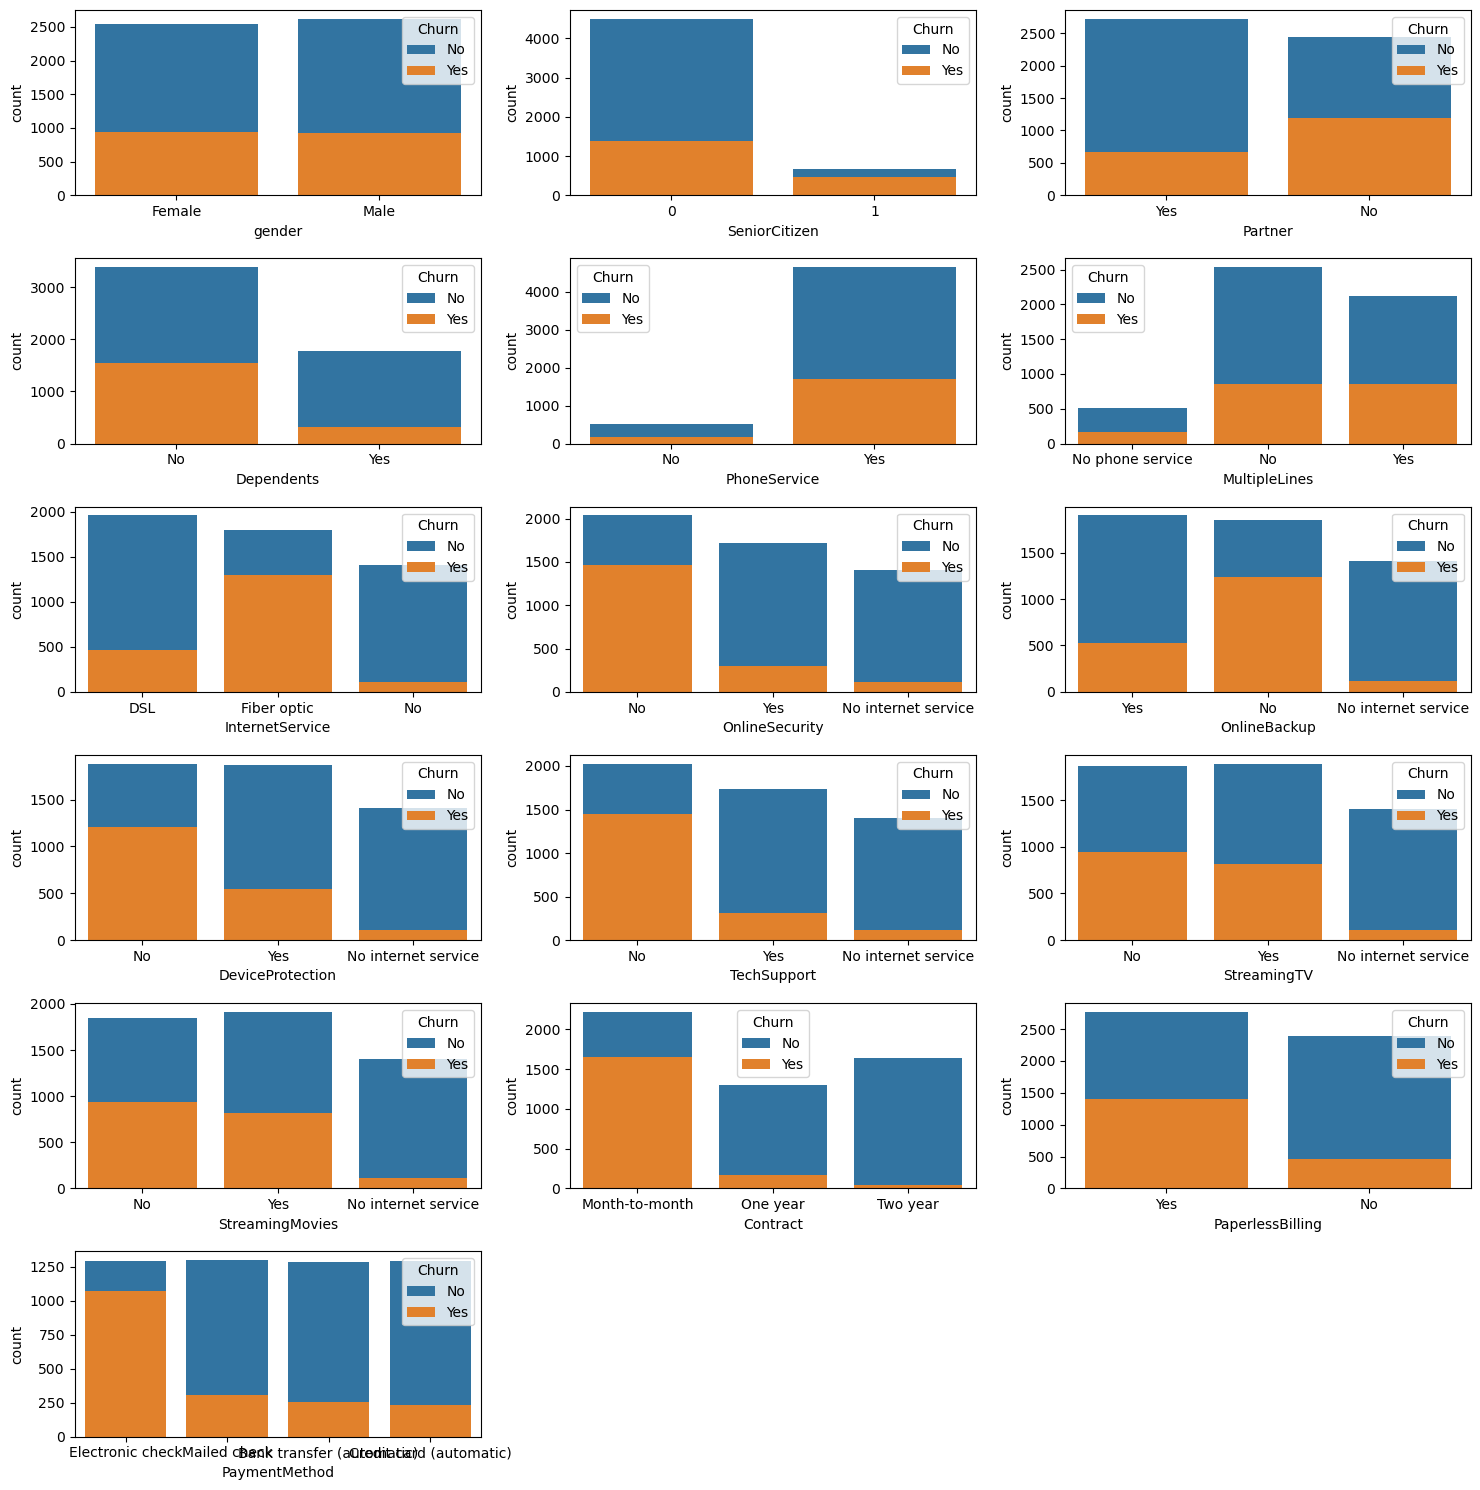

In [24]:
plt.figure(figsize=(15,15))
for i, col in enumerate(obj_cols):
    plt.subplot(6,3,i+1)
    g = sns.countplot(dataset, x=col, hue='Churn', dodge=False)
plt.tight_layout()
plt.show()

To see the probability of each categorical feature getting Churn, the target needs to be transformed into 0 and 1.

In [16]:
le = LabelEncoder()
dataset['ChurnEncoded'] = le.fit_transform(dataset['Churn'])
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnEncoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


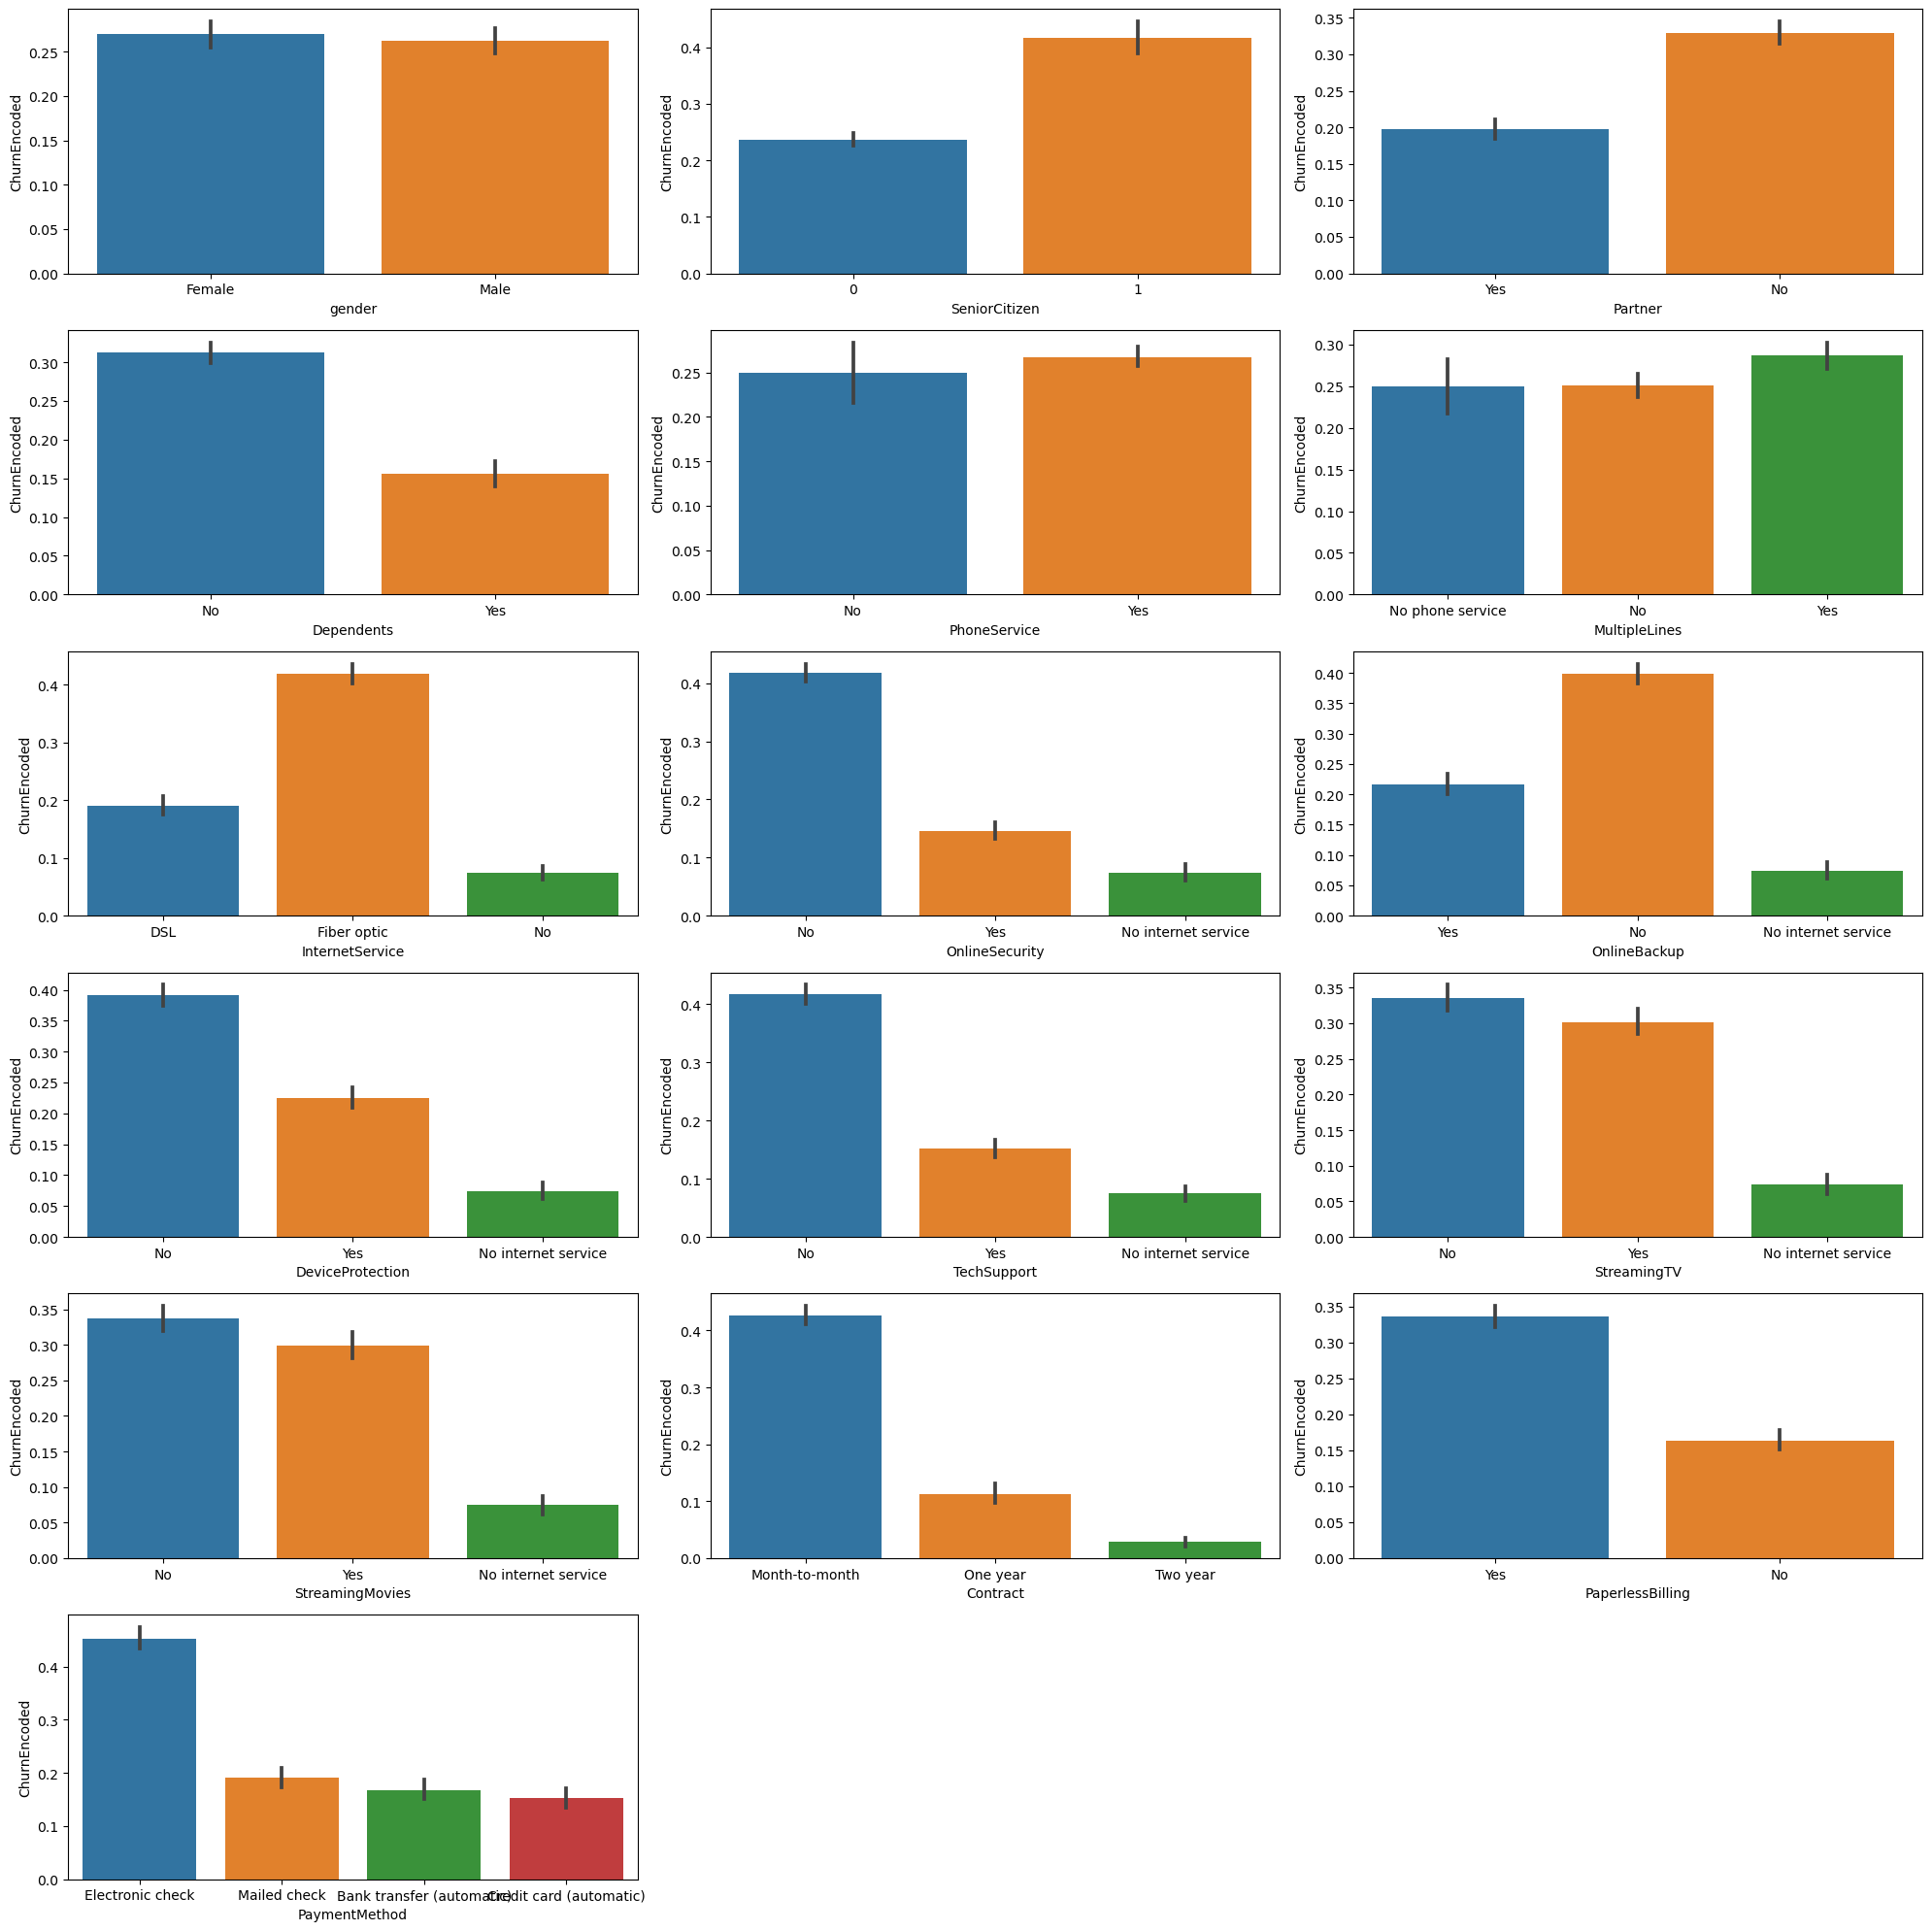

In [26]:
plt.figure(figsize=(20,20))
for i, col in enumerate(obj_cols):
    plt.subplot(6,3,i+1)
    g = sns.barplot(dataset, x=col, y="ChurnEncoded")
plt.tight_layout()
plt.show()

Judging from the last two plots, there are some interesting takeaways:
* PaymentMethod spreads evenly among all customers, and looking from the probability of Churn, this feature is likely to have an impact for the predictive model
* Some other features that may have big impact for the predictive model are InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, and Contract

In [17]:
dataset.groupby(by=["Churn", "StreamingMovies"]).count()

customerID  gender  SeniorCitizen  Partner  \
Churn StreamingMovies                                                   
No    No                         1843    1843           1843     1843   
      No internet service        1407    1407           1407     1407   
      Yes                        1913    1913           1913     1913   
Yes   No                          938     938            938      938   
      No internet service         113     113            113      113   
      Yes                         818     818            818      818   

                           Dependents  tenure  PhoneService  MultipleLines  \
Churn StreamingMovies                                                        
No    No                         1843    1843          1843           1843   
      No internet service        1407    1407          1407           1407   
      Yes                        1913    1913          1913           1913   
Yes   No                          938     938           938            938   
      No internet service         113     113           113            113   
      Yes                         818     818           818            818   

                           InternetService  OnlineSecurity  OnlineBackup  \
Churn StreamingMovies                                                      
No    No                              1843            1843          1843   
      No internet service             1407            1407          1407   
      Yes                             1913            1913          1913   
Yes   No                               938             938           938   
      No internet service              113             113           113   
      Yes                              818             818           818   

                           DeviceProtection  TechSupport  StreamingTV  \
Churn StreamingMovies                                                   
No    No                               1843         1843         1843   
      No internet service              1407         1407         1407   
      Yes                              1913         1913         1913   
Yes   No                                938          938          938   
      No internet service               113          113          113   
      Yes                               818          818          818   

                           Contract  PaperlessBilling  PaymentMethod  \
Churn StreamingMovies                                                  
No    No                       1843              1843           1843   
      No internet service      1407              1407           1407   
      Yes                      1913              1913           1913   
Yes   No                        938               938            938   
      No internet service       113               113            113   
      Yes                       818               818            818   

                           MonthlyCharges  TotalCharges  ChurnEncoded  
Churn StreamingMovies                                                  
No    No                             1843          1843          1843  
      No internet service            1407          1407          1407  
      Yes                            1913          1913          1913  
Yes   No                              938           938           938  
      No internet service             113           113           113  
      Yes                             818           818           818

In [28]:
dataset.groupby(by='Dependents').mean(numeric_only=True)

,tenure,MonthlyCharges,TotalCharges,ChurnEncoded
Dependents,,,,
No,29.806000,67.002808,2187.709254,0.312791
Yes,38.569319,59.617032,2507.955669,0.155312


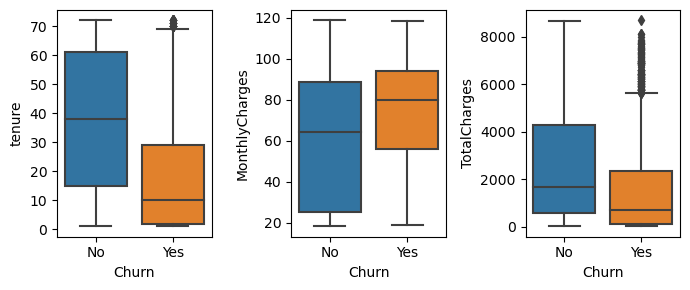

In [29]:
plt.figure(figsize=(7,3))
for i, col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    g = sns.boxplot(dataset, x="Churn", y=col)
plt.tight_layout()
plt.show()

Looks like churn is more likely to happen to new customers, altough there are some customer with high number of tenure that also leave the platform. This will be interesting to look further into.

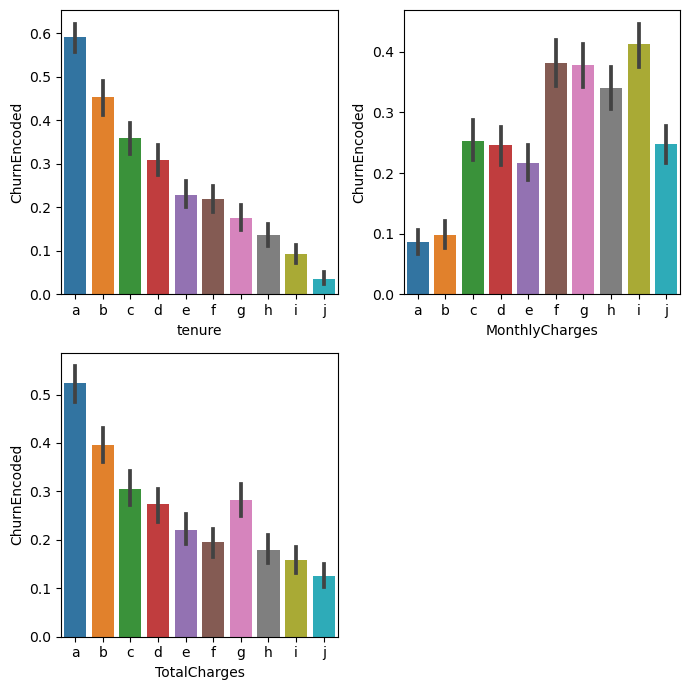

In [18]:
plt.figure(figsize=(7,7))
for i, col in enumerate(num_cols):
    label = ['a','b','c','d','e','f','g','h','i','j']
    dummy_data = pd.DataFrame({col: pd.qcut(dataset[col], 10, labels=label), "ChurnEncoded": dataset['ChurnEncoded']})
    plt.subplot(2,2,i+1)
    g = sns.barplot(data=dummy_data, x=col, y="ChurnEncoded")
plt.tight_layout()
plt.show()
del dummy_data

tenure 0.23773083190513133
MonthlyCharges -0.22210292770166232
TotalCharges 0.9616424997242504


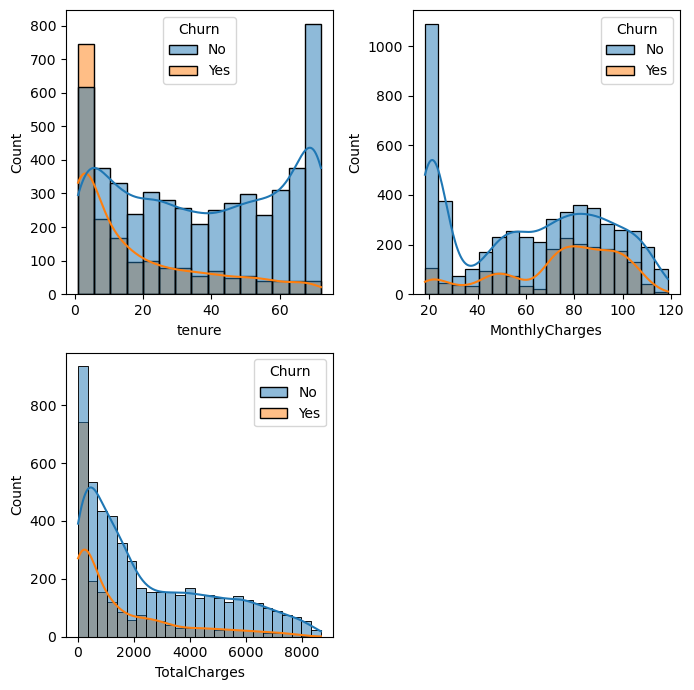

In [31]:
plt.figure(figsize=(7,7))
for i, col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    g = sns.histplot(dataset, x=col, kde=True, hue='Churn')
    print(col, dataset[col].skew())
plt.tight_layout()
plt.show()

## Feature Importance

Before doing feature importance, the data will be cleaned by removing unuseful feature columns

In [19]:
dataset.drop(['customerID', 'Churn'], axis=1, inplace=True)

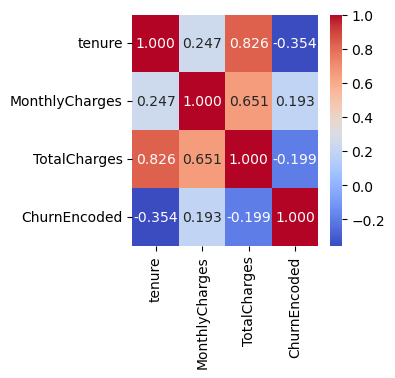

In [20]:
# Correlation between numerical values
plt.figure(figsize=(3,3))
plot = sns.heatmap(dataset[['tenure', 'MonthlyCharges', 'TotalCharges', 'ChurnEncoded']].corr(),
                  annot=True,
                  fmt='.3f',
                  cmap='coolwarm')

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
SeniorCitizen       0.010533
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


<AxesSubplot: >

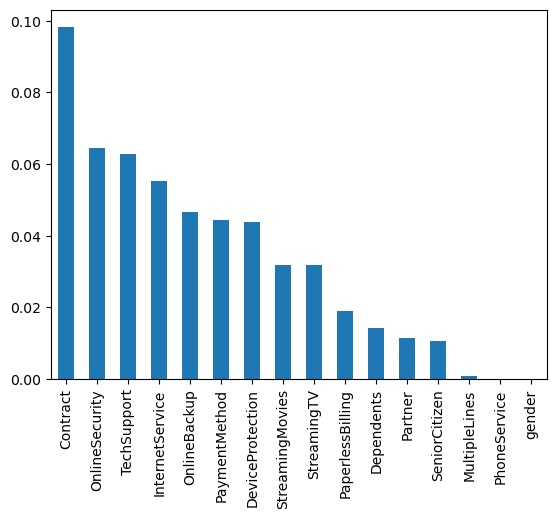

In [21]:
from sklearn.metrics import mutual_info_score

def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, dataset['ChurnEncoded'])

# compute the mutual information score between each categorical variable and the target
feature_importance = dataset[obj_cols].apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)
feature_importance.plot(kind='bar')

Judging from the mutual information score of the categorical features, and looking back to the categorical features vs churn probability plot, there are a couple of categorical features that better be dropped, because otherwise these features would only be noises for the final model.

Categorical Features to be dropped: gender, PhoneService, MultipleLines, SeniorCitizen, and Partner

In [22]:
dataset.drop(['gender', 'PhoneService', 'MultipleLines', 'SeniorCitizen', 'Partner'], axis=1, inplace=True)
dataset.head()

,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnEncoded
0,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Feature Engineering

### Numerical Features

In [23]:
# Splitting between independence features and target feature (Churn)

# Place ChurnEncoded column to new variable and drop it from the original table
Target = dataset['ChurnEncoded']
dataset.drop('ChurnEncoded', axis=1, inplace=True)

In [24]:
print(dataset.shape)
dataset.head()

(7032, 14)


,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


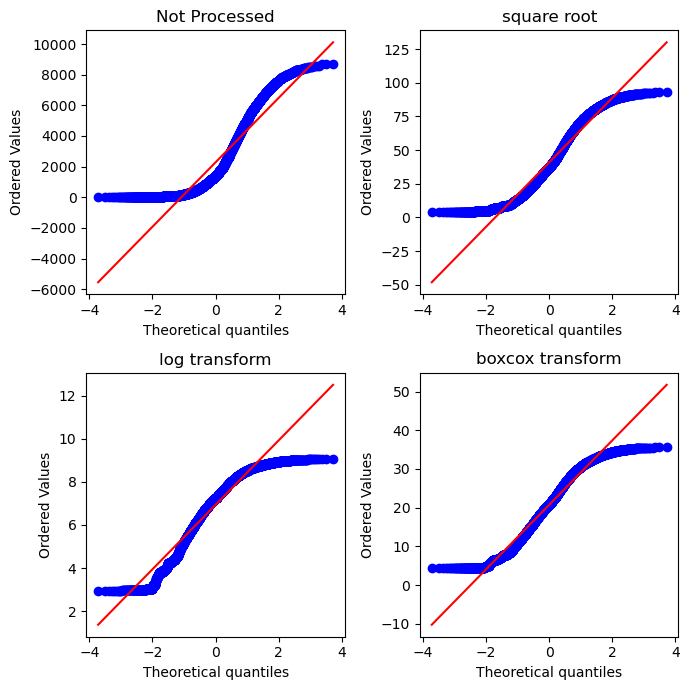

In [25]:
plt.figure(figsize=(7,7))
plt.subplot(221)
stats.probplot(dataset['TotalCharges'], plot=plt)
plt.title("Not Processed")
plt.subplot(222)
stats.probplot(np.sqrt(dataset['TotalCharges']), plot=plt)
plt.title("square root")
plt.subplot(223)
stats.probplot(np.log(dataset['TotalCharges']), plot=plt)
plt.title("log transform")
plt.subplot(224)
stats.probplot(stats.boxcox(dataset['TotalCharges'])[0], plot=plt)
plt.title("boxcox transform")
plt.tight_layout()
plt.show()

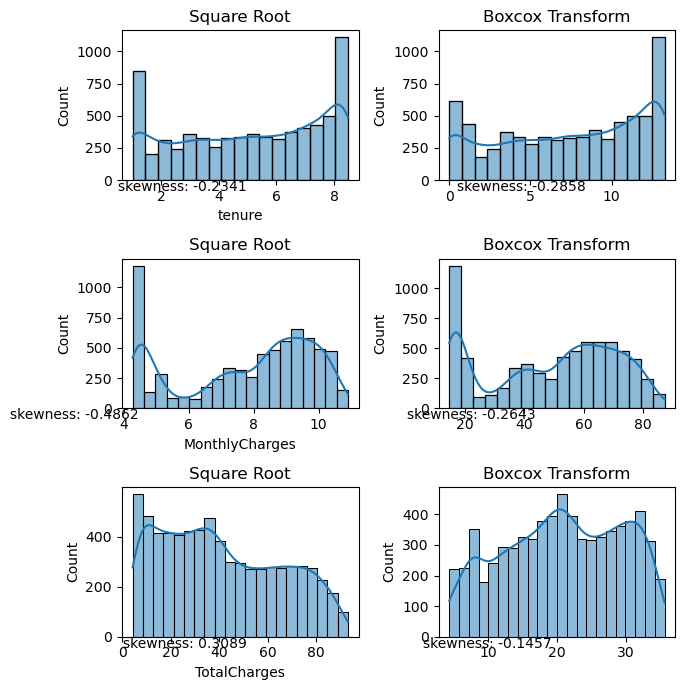

In [26]:
plt.figure(figsize=(7,7))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, (i+1)*2-1)
    g = sns.histplot(np.sqrt(dataset[col]), kde=True)
    skew = stats.skew(np.sqrt(dataset[col]))
    plt.text(0.5, 0.5, "skewness: %.4f"%skew, ha="left", va="top")
    plt.title("Square Root")
    plt.subplot(3, 2, (i+1)*2)
    g = sns.histplot(stats.boxcox(dataset[col])[0], kde=True)
    skew = stats.skew(stats.boxcox(dataset[col])[0])
    plt.text(0.5, 0.5, "skewness: %.4f"%skew, ha="left", va="top")
    plt.title("Boxcox Transform")
plt.tight_layout()
plt.show()

Judging from the two plots above, using boxcox transformation for TotalCharges could lower the skewness and makes the data shaped closer to a normal distribution

In [27]:
dataset['TotalCharges'] = stats.boxcox(dataset['TotalCharges'])[0]

In [28]:
# to make things less complicated, I decided to bin tenure for every 12 months

group_by = 12
labels = ["{}-{} year".format(i, i+1) for i in range(int(np.ceil(dataset['tenure'].max()/group_by)))]
bins = [i*group_by for i in range(int(np.ceil(dataset['tenure'].max()/group_by))+1)]
dataset['tenure'] = pd.cut(dataset['tenure'], bins=bins, labels=labels)
dataset.head()

,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,0-1 year,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,5.399287
1,No,2-3 year,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,22.900956
2,No,0-1 year,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,9.018523
3,No,3-4 year,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,22.722905
4,No,0-1 year,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,10.182711


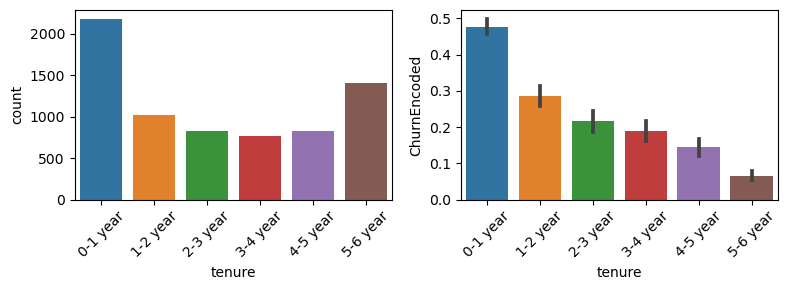

In [29]:
plt.figure(figsize=(8,3))
plt.subplot(121)
g = sns.countplot(dataset, x="tenure")#, hue='Churn', dodge=False)
plt.xticks(rotation=45)
plt.subplot(122)
g = sns.barplot(pd.concat([dataset,Target], axis=1), x="tenure", y='ChurnEncoded')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

After we bin the tenure feature, it looks more usable and we can definitely see a pattern here. The longer a customer use the platform, they will be less likely to churn.

In [30]:
dataset.describe()

,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000
mean,64.798208,20.749319
std,30.085974,8.469342
min,18.250000,4.363219
25%,35.587500,14.153799
50%,70.350000,20.916628
75%,89.862500,28.116094
max,118.750000,35.640407


In [31]:
class MinMax():
    
    def __init__(self):
        self.min_data = None
        self.max_data = None
    
    def fit_transform(self, data):
        self.min_data = data.min()
        self.max_data = data.max()
        data = (data-self.min_data)/(self.max_data-self.min_data)
        return data
    
    def transform(self, data):
        try:
            data = (data-self.min_data)/(self.max_data-self.min_data)
            return data
        except:
            print("The scaler hasn't been fitted yet")

In [32]:
monthly_scaler = MinMax()
dataset["MonthlyCharges"] = monthly_scaler.fit_transform(dataset["MonthlyCharges"])
tc_scaler = MinMax()
dataset["TotalCharges"] = tc_scaler.fit_transform(dataset["TotalCharges"])
dataset.describe()

,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000
mean,0.463166,0.523899
std,0.299363,0.270783
min,0.000000,0.000000
25%,0.172512,0.313026
50%,0.518408,0.529249
75%,0.712562,0.759431
max,1.000000,1.000000


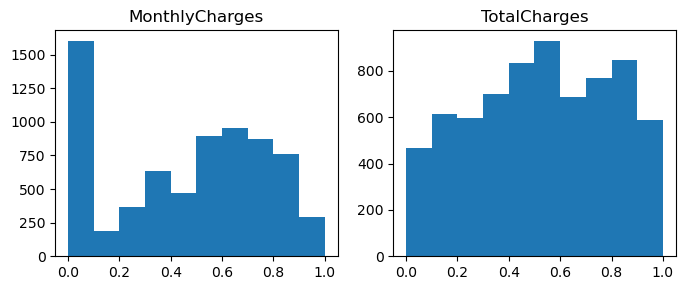

In [33]:
plt.figure(figsize=(7,3))
plt.subplot(121)
plt.hist(dataset['MonthlyCharges'])
plt.title('MonthlyCharges')
plt.subplot(122)
plt.hist(dataset['TotalCharges'])
plt.title('TotalCharges')
plt.tight_layout()
plt.show()

In [35]:
print(dataset['MonthlyCharges'].skew())
print(np.sqrt(dataset['MonthlyCharges']).skew())
print(stats.boxcox(dataset['MonthlyCharges']+0.000000001)[1])

-0.22210292770166273
-0.7046650839889121
0.6737160810298887


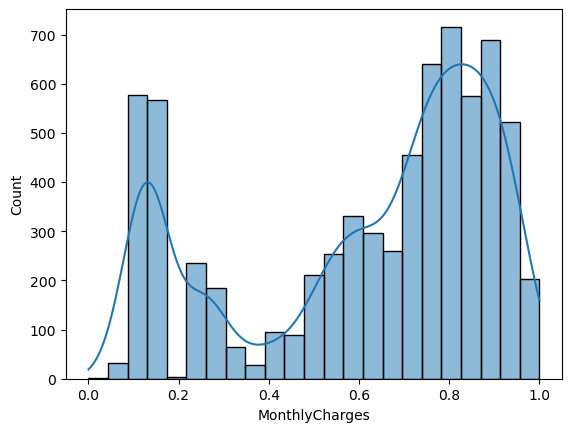

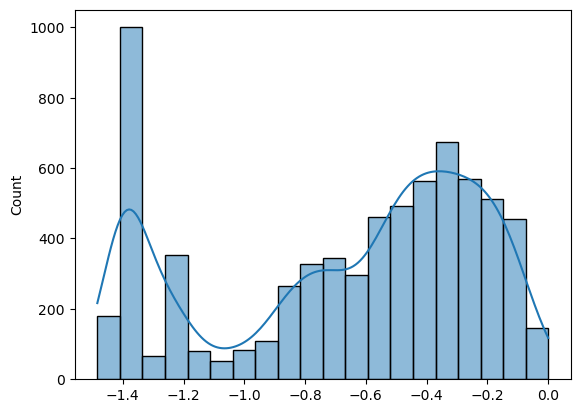

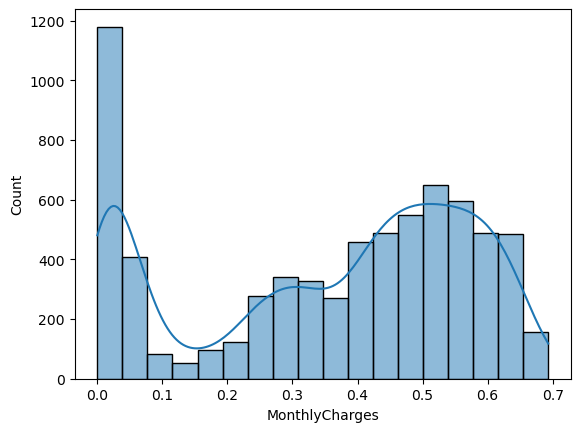

In [48]:
plt.figure()
g = sns.histplot(np.sqrt(dataset['MonthlyCharges']), kde=True)
plt.figure()
g = sns.histplot(stats.boxcox(dataset['MonthlyCharges']+0.00000001)[0], kde=True)
plt.figure()
g = sns.histplot(np.log1p(dataset['MonthlyCharges']), kde=True)

MonthlyCharges feature doesn't look like it has anywhere near a normal distribution no matter what transformation we use, which doesn't help at all for linear models because they rely on the data to have normal distribution to be able to perform well enough.

Binning them might be the way to go, but firstly we'll see how it goes if we just use this feature as it is.

### Categorical Features

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Dependents        7032 non-null   object  
 1   tenure            7032 non-null   category
 2   InternetService   7032 non-null   object  
 3   OnlineSecurity    7032 non-null   object  
 4   OnlineBackup      7032 non-null   object  
 5   DeviceProtection  7032 non-null   object  
 6   TechSupport       7032 non-null   object  
 7   StreamingTV       7032 non-null   object  
 8   StreamingMovies   7032 non-null   object  
 9   Contract          7032 non-null   object  
 10  PaperlessBilling  7032 non-null   object  
 11  PaymentMethod     7032 non-null   object  
 12  MonthlyCharges    7032 non-null   float64 
 13  TotalCharges      7032 non-null   float64 
dtypes: category(1), float64(2), object(11)
memory usage: 721.4+ KB


#### Converting Categorical Features

In [36]:
# Converting tenure with LabelEncoder because this feature is ordinal
mapping = {}
for i, year in enumerate(dataset['tenure'].sort_values().unique()):
    mapping[year] = i

dataset['tenure'] = dataset['tenure'].map(mapping).astype('int')

In [20]:
(dataset.describe(include=['O'])).loc['unique']

Dependents          2
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Name: unique, dtype: object

In [37]:
# Convert all feature columns with binary values
le = LabelEncoder()
dataset['Dependents'] = le.fit_transform(dataset['Dependents']).astype('int')
dataset['PaperlessBilling'] = le.fit_transform(dataset['PaperlessBilling']).astype('int')

In [38]:
# Use one-hot encoding for the rest of the categorical features
# since they don't possess any level

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

def OHEncoder(df, cols):
    for col in cols:
        ohe = OneHotEncoder(dtype='int')
        testing = pd.DataFrame(ohe.fit_transform(df[[col]]).toarray(), columns=ohe.get_feature_names_out())
        df = pd.concat([df, testing], axis=1)
        df.drop(col, axis=1, inplace=True)
    return df

In [39]:
big_cat_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

dataset = OHEncoder(dataset, big_cat_cols)
dataset.head()

,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0.115423,0.033125,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,2,0,0.385075,0.592692,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,1,0.354229,0.148840,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,3,0,0.239303,0.586999,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,1,0.521891,0.186062,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0


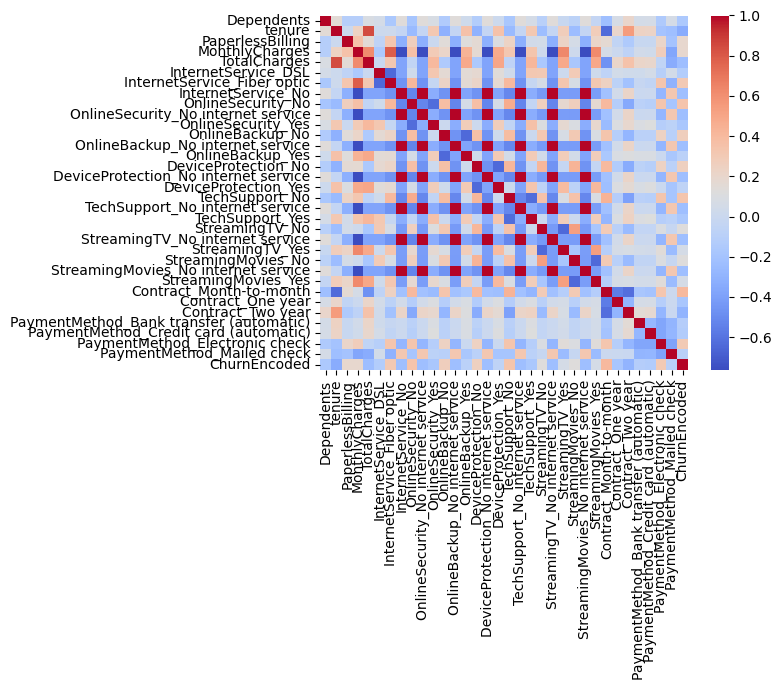

In [40]:
plt.figure(figsize=(8,7))
g = sns.heatmap(pd.concat([dataset, Target], axis=1).corr(),
                   annot=False,
                   fmt='.3f',
                   cmap = 'coolwarm')
plt.tight_layout()

We can see clearly from the correlation plot above that every column that has something to do with No Internet Service has very high correlation between eachother. To confirm that those columns are indeed have the same exact value, some checking is needed.

To do that, I'm going to collect all the rows that have the value of 1 in any of the column that we're observing, and then look for 0 in any of the extracted rows.

In [59]:
checker = dataset[[col for col in dataset.columns if col.endswith('No internet service')]+["InternetService_No"]]
checker1= checker[checker.isin([1]).any(axis=1)]
display(checker1[checker1.isin([0]).any(axis=1)])
del checker
del checker1

,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,StreamingTV_No internet service,StreamingMovies_No internet service,InternetService_No


Confirmed that all the columns observed has the same values. To reduce the amount of features, therefore reducing the amount of noise, I'm going to drop all those column except the column InternetService_No.

In [60]:
dataset_final = dataset.drop([col for col in dataset.columns if col.endswith('No internet service')], axis=1)
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Dependents                               7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   PaperlessBilling                         7032 non-null   int64  
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   InternetService_DSL                      7032 non-null   int64  
 6   InternetService_Fiber optic              7032 non-null   int64  
 7   InternetService_No                       7032 non-null   int64  
 8   OnlineSecurity_No                        7032 non-null   int64  
 9   OnlineSecurity_Yes                       7032 non-null   int64  
 10  OnlineBackup_No                          7032 no

## Simple Modeling for Feature Importance Analysis

### Logistic Regression

In [61]:
# Normalize Tenure feature for logistic regression purpose
df_lr = dataset_final.copy()
tenure_scaler = MinMax()
df_lr['tenure'] = tenure_scaler.fit_transform(df_lr['tenure'])

In [62]:
from sklearn.linear_model import LogisticRegression

LR_fi = LogisticRegression(random_state=17, max_iter=250)
LR_fi.fit(df_lr, Target)
LR_fi.score(df_lr, Target)

0.8051763367463026

In [63]:
coefs = pd.DataFrame({'feature':LR_fi.feature_names_in_, 'coef':abs(np.squeeze(LR_fi.coef_))})
coefs.sort_values(by='coef', ascending=False).head(20)

,feature,coef
4,TotalCharges,3.927306
22,Contract_Two year,0.880163
20,Contract_Month-to-month,0.828072
6,InternetService_Fiber optic,0.753409
1,tenure,0.575373
7,InternetService_No,0.410457
3,MonthlyCharges,0.408531
19,StreamingMovies_Yes,0.407450
17,StreamingTV_Yes,0.398623
2,PaperlessBilling,0.366520


<Figure size 700x500 with 0 Axes>

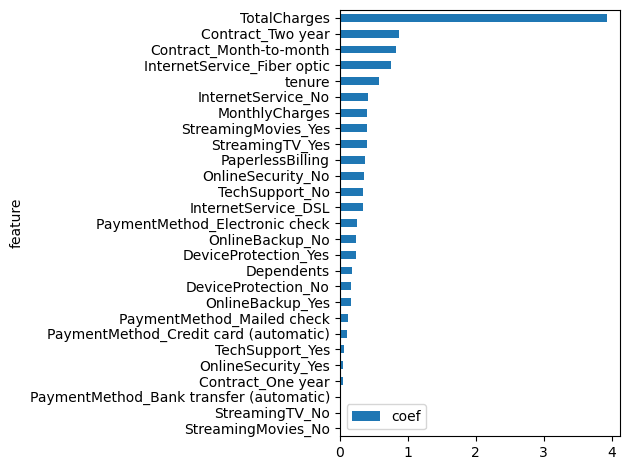

In [64]:
plt.figure(figsize=(7,5))
coefs.sort_values(by='coef').plot(y='coef', x='feature', kind='barh')
plt.tight_layout()
plt.show()

Looking at the plot, it's very obvious that the TotaCharges feature takes the lead as the most influential feature for this prediction, the rest are just there for vibes. One important thing to remember is that this is a linear model, so this feature importance only comes from the coeficient of each feature leading to the prediction. We could get more insights by using more sophisticated model such as decision tree and random forest classifier.

### Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier

DT_fi = DecisionTreeClassifier(random_state=17)
DT_fi.fit(dataset_final, Target)
DT_fi.score(dataset_final, Target)

0.9963026166097838

In [66]:
DT_features = pd.DataFrame({'feature':DT_fi.feature_names_in_, 'coef':DT_fi.feature_importances_})
DT_features.sort_values(by='coef', ascending=False).reset_index(drop=True)

,feature,coef
0,TotalCharges,0.294237
1,MonthlyCharges,0.250120
2,Contract_Month-to-month,0.165516
3,InternetService_Fiber optic,0.049221
4,Dependents,0.024674
5,PaperlessBilling,0.021227
6,PaymentMethod_Electronic check,0.020689
7,PaymentMethod_Credit card (automatic),0.013965
8,PaymentMethod_Mailed check,0.013654
9,PaymentMethod_Bank transfer (automatic),0.013587


<Figure size 700x500 with 0 Axes>

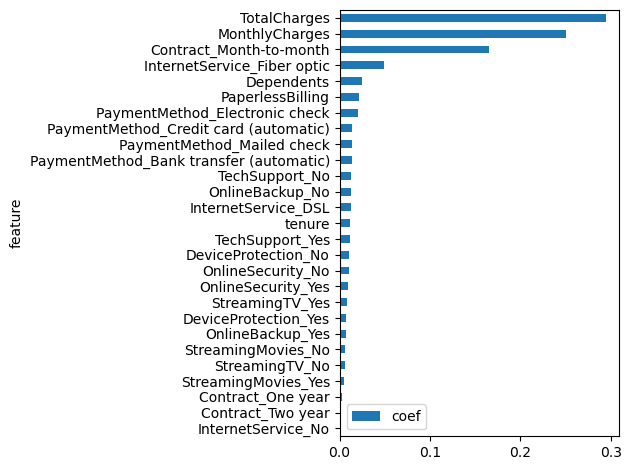

In [67]:
plt.figure(figsize=(7,5))
DT_features.sort_values(by='coef').plot(y='coef', x='feature', kind='barh')
plt.tight_layout()
plt.show()

### Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

RF_fi = RandomForestClassifier(random_state=17)
RF_fi.fit(dataset_final, Target)
RF_fi.score(dataset_final, Target)

0.9963026166097838

In [70]:
RF_fi_std = np.std([RF_fi.feature_importances_ for tree in RF_fi.estimators_], axis=0)
forest_importances = pd.Series(RF_fi.feature_importances_, index=RF_fi.feature_names_in_)
forest_importances.sort_values(ascending=False)

TotalCharges                               0.256638
MonthlyCharges                             0.221701
tenure                                     0.074069
Contract_Month-to-month                    0.063678
OnlineSecurity_No                          0.035379
InternetService_Fiber optic                0.033057
PaymentMethod_Electronic check             0.030012
PaperlessBilling                           0.028707
TechSupport_No                             0.027115
Dependents                                 0.024747
OnlineBackup_No                            0.018541
Contract_Two year                          0.017086
DeviceProtection_No                        0.015425
PaymentMethod_Credit card (automatic)      0.013397
PaymentMethod_Bank transfer (automatic)    0.013075
DeviceProtection_Yes                       0.012294
OnlineBackup_Yes                           0.012241
StreamingTV_Yes                            0.012159
StreamingMovies_No                         0.012009
PaymentMetho

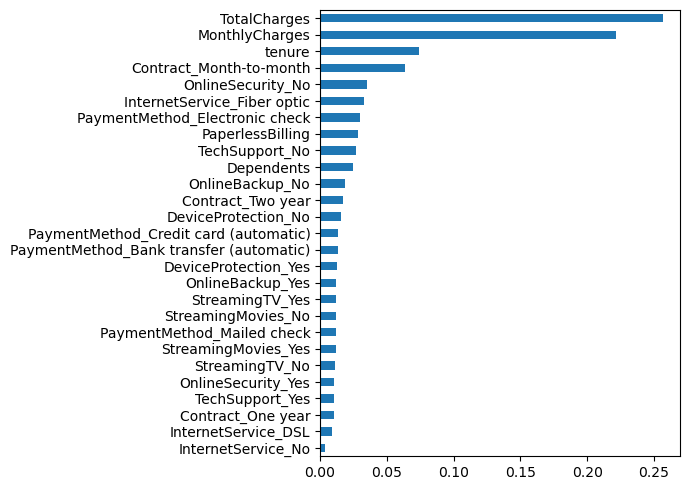

In [71]:
plt.figure(figsize=(7,5))
forest_importances.sort_values().plot(kind='barh', xerr=RF_fi_std)
plt.tight_layout()
plt.show()

## Saving Final Dataframe

In [72]:
pd.concat([dataset_final, Target], axis=1).to_csv('CustomerChurnFinal.csv', index=False)

***

In [2]:
dataset = pd.read_csv('CustomerChurnFinal.csv')
Target = dataset['ChurnEncoded']
dataset.drop('ChurnEncoded', axis=1, inplace=True)

In [3]:
dataset.head()

,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0.115423,0.033125,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,2,0,0.385075,0.592692,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,1,0.354229,0.148840,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
3,0,3,0,0.239303,0.586999,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,1,0.521891,0.186062,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


## Modeling

In [75]:
# Splitting Dataset to train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, Target, test_size=0.2, random_state=17)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5625, 27)
(5625,)
(1407, 27)
(1407,)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
import time

In [77]:
kfold = StratifiedKFold(n_splits=9)

In [87]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def BaselinePerformance(X_train, y_train):
    
    ModelNames = ["LogReg", "Random forest", "Extra trees", "AdaBoost", "GradBoost", "SVC", "Decision tree", "KNeighbors", "MLP", "XGB"]
    
    random_state = 17
    models = []
    models.append(LogisticRegression(random_state=random_state))
    models.append(RandomForestClassifier(random_state=random_state))
    models.append(ExtraTreesClassifier(random_state=random_state))
    models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1))
    models.append(GradientBoostingClassifier(random_state=random_state))
    models.append(SVC(random_state=random_state))
    models.append(DecisionTreeClassifier(random_state=random_state))
    models.append(KNeighborsClassifier())
    models.append(MLPClassifier(random_state=random_state))
    models.append(XGBClassifier(random_state=random_state))

    scores = []
    for i, model in enumerate(models):
      scores.append(cross_val_score(model, X_train, y=y_train, scoring="recall", cv=kfold, n_jobs=-1))
      print("Model {} done".format(ModelNames[i]))
    print("All Models finished training")

    scores_mean = []
    scores_std = []
    for score in scores:
        scores_mean.append(score.mean())
        scores_std.append(score.std())

    scores_df = pd.DataFrame({
        "Mean_acc": scores_mean,
        "Std_acc": scores_std,
        "Models": ModelNames
    })
    return scores_df

In [88]:
scores_df = BaselinePerformance(X_train, y_train)

/Users/ms/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model LogReg done
Model Random forest done
Model Extra trees done
Model AdaBoost done
Model GradBoost done
Model SVC done
Model Decision tree done
Model KNeighbors done


/Users/ms/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ms/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ms/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ms/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Model MLP done
Model XGB done
All Models finished training


In [89]:
scores_df.sort_values(by='Mean_acc', ascending=False)

,Mean_acc,Std_acc,Models
8,0.611444,0.052994,MLP
4,0.535595,0.039931,GradBoost
9,0.531603,0.036014,XGB
7,0.530938,0.030402,KNeighbors
0,0.520958,0.046211,LogReg
1,0.518962,0.037872,Random forest
3,0.517631,0.026346,AdaBoost
2,0.516301,0.034891,Extra trees
6,0.509647,0.030721,Decision tree
5,0.474385,0.039294,SVC


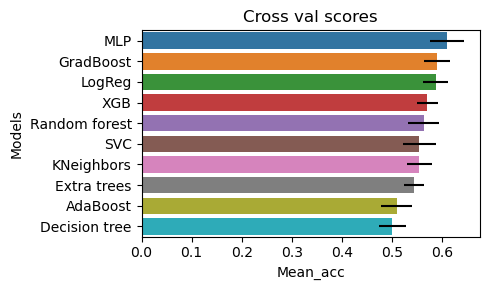

In [81]:
plt.figure(figsize=(5,3))
g = sns.barplot(x="Mean_acc",y="Models",data = scores_df.sort_values(by='Mean_acc', ascending=False),orient = "h",**{'xerr':scores_df['Std_acc']})
g = g.set_title("Cross val scores")
plt.tight_layout()
plt.show()

### Experiment with Binning the TotalCharges Column Before Modeling

As mentioned earlier, the TotalCharges column may cause some "turbulance" for the model. We'll see if binning the feature may lessen the effect of that.

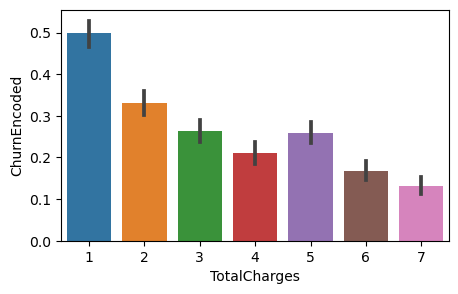

In [90]:
bins = 7
custom = pd.qcut(dataset['TotalCharges'], q=bins, labels=[i+1 for i in range(bins)]).astype('int')
plt.figure(figsize=(5,3))
g = sns.barplot(pd.concat([custom,Target], axis=1), x="TotalCharges", y='ChurnEncoded')
plt.show()

In [91]:
dataset_exp = dataset.copy()
dataset_exp['TotalCharges'] = custom

X_train, X_test, y_train, y_test = train_test_split(dataset_exp, Target, test_size=0.2, random_state=17)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5625, 27)
(5625,)
(1407, 27)
(1407,)


In [92]:
scores_df_exp = BaselinePerformance(X_train, y_train)

Model LogReg done
Model Random forest done
Model Extra trees done
Model AdaBoost done
Model GradBoost done
Model SVC done
Model Decision tree done
Model KNeighbors done


/Users/ms/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ms/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ms/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ms/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Model MLP done
Model XGB done
All Models finished training


In [93]:
scores_df_exp.sort_values(by='Mean_acc', ascending=False)

,Mean_acc,Std_acc,Models
8,0.603460,0.040787,MLP
4,0.544245,0.037708,GradBoost
7,0.541583,0.034700,KNeighbors
9,0.520958,0.047150,XGB
3,0.516301,0.036997,AdaBoost
6,0.512309,0.041784,Decision tree
0,0.508317,0.040361,LogReg
1,0.494345,0.025888,Random forest
2,0.487026,0.019145,Extra trees
5,0.449102,0.051356,SVC


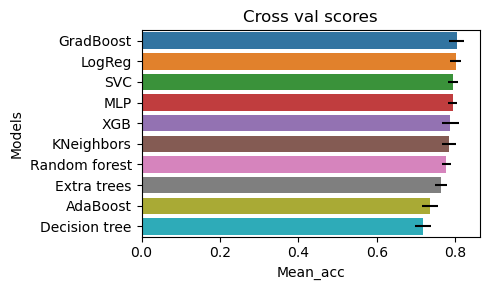

In [51]:
plt.figure(figsize=(5,3))
g = sns.barplot(x="Mean_acc",y="Models",data = scores_df_exp.sort_values(by='Mean_acc', ascending=False),orient = "h",**{'xerr':scores_df_exp['Std_acc']})
g = g.set_title("Cross val scores")
plt.tight_layout()
plt.show()

Generally the model performs quite similarly, they separated by just about 100th of accuracy. Although, models using raw TotalCharges have better recall overall. So in conclusion, leaving TotalCharges feature might be the best bet.

### Sampling

It's obvious that the recall of the model is still quite low (not even .7 for the best performing model) and the fact that the dataset is imbalance (25 vs 75) doesn't help at all. To help the model gain better Recall and accuracy in general, one of the ways is to do oversampling for the lower percentage model, which in this case is the posivie labeled data. Undersampling the negative labeled data is also possible but in this case, since the data we have is not very massive, undersampling may cause the model to not learn enough data. There are several ways to do uppersampling:
* SMOT (

In [73]:
RF_test = RandomForestClassifier(random_state=17)
RF_test.fit(X_train[:math.ceil(X_train.shape[0]*0.9)], y_train[:math.ceil(y_train.shape[0]*0.9)])
RF_test.score(X_train[math.ceil(X_train.shape[0]*0.9):], y_train[math.ceil(X_train.shape[0]*0.9):])

/var/folders/s9/lg95mzg96bnd11x1mf3c8skw0000gn/T/ipykernel_70279/3984414345.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  RF_test.fit(X_train[:math.ceil(X_train.shape[0]*0.9)], y_train[:math.ceil(y_train.shape[0]*0.9)])
/var/folders/s9/lg95mzg96bnd11x1mf3c8skw0000gn/T/ipykernel_70279/3984414345.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  RF_test.score(X_train[math.ceil(X_train.shape[0]*0.9):], y_train[math.ceil(X_train.shape[0]*0.9):])


0.7775800711743772

## Creating Data Preprocessing Pipeline
---
In order to make the model reproducible, a data preprocessing pipeline needs to be created. Having a pipeline that could digest raw data and transform them into the desired format for the model will be very handy for futher purpose of the model. Not only that, this will also help in validating the model performance because, having this pipeline, the testset data can be preprocessed separately from the training set and the validation set data.

These are the preprocessing steps that must be included in the pipeline:
* drop any row having TotalCharges as " "
* convert TotalCharges column into integer
* Drop columns: customerID, gender, PhoneService, MultipleLines, SeniorCitizen, Partner
* Transform TotalCharges using boxcox transformation
* Bin tenure column by year, so 0-12 month would be 0-1 year, 13-24 month would be 1-2 year and so on
* Transform MonthlyCharges and TotalCharges using MinMaxScaller
* Transfrom Dependents and PapperlessBilling using LabelEncoder
* Use OneHotEncoder to transform these categorical columns: InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod
* Drop all columns that ends with "No internet service" and "InternetService_No"